In [2]:
import obspy
from obspy import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import yaml
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D

In [3]:
with open('/home/smocz/expand_redpy/scripts/config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
    
homedir = config['homedir']
readdir = config['readdir']

today = '2022-11-08T00:00:00'

In [4]:
#parameters
volc_md = pd.read_csv(readdir+'Volcano_Metadata.csv') #read metadata
volc_md['netsta'] = volc_md['Network'].astype(str)+'.'+volc_md['Station'].astype(str) #get net.sta
volc_list_names = ['Baker','Hood','Newberry','Rainier','St_Helens'] # list of names of each volcano


# netsta = volc_md['netsta'].values.tolist() #make netsta a list
# start = volc_md['Starttime'].values.tolist() #make starttimes a list
# end = volc_md['Endtime'].values.tolist() #make endtimes a list
# for ii,i in enumerate(end): #change the foreseeable future endtimes (2599-12-31T23:59:59) to today's date
#     if i == '2599-12-31T23:59:59':
#         end[ii]=today
label_names = ['Longer than or Equal to 20 Years','Between 20 and 3 Years','Shorter than or Equal to 3 Years, \
but Longer than 1','REDPy Catalog Starts',]
colors = ['green','blue','orange','red']

Baker
Hood
Newberry
Rainier
St_Helens


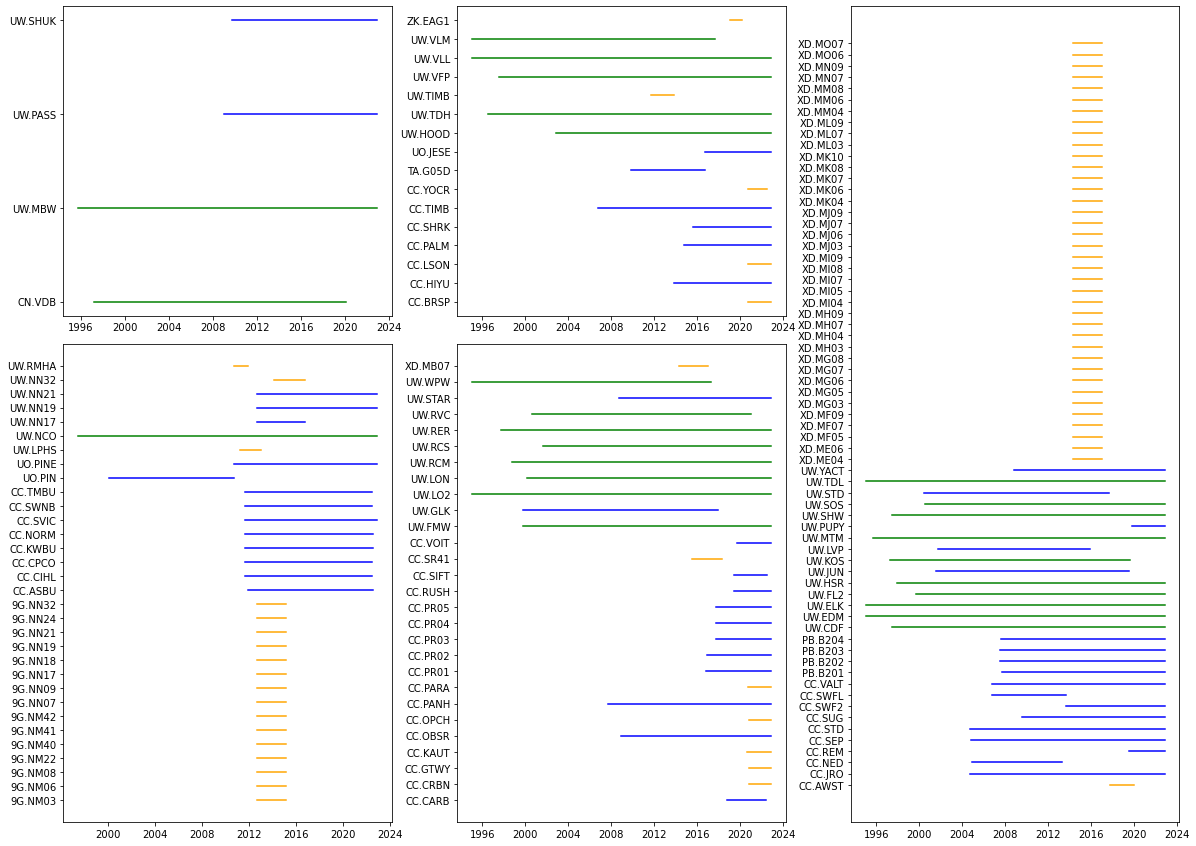

<Figure size 1080x2160 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(20,15)) #make the figure and set the size

gs = GridSpec(5, 3, figure=fig) #make GridSpec for formatting subplots
ax1 = fig.add_subplot(gs[:2, :1]) #make subplots (1 subplot/volcano) and set shape and location with GridSpec
ax2 = fig.add_subplot(gs[:2, 1:2])
ax3 = fig.add_subplot(gs[2:5, 0])
ax4 = fig.add_subplot(gs[2:5, -2])
ax5 = fig.add_subplot(gs[:, -1])

axs = [ax1,ax2,ax3,ax4,ax5] #make list of subplots to loop through

for vv,v in enumerate(volc_list_names): #for each volcano
#     print(v)
    netsta = volc_md[volc_md['Volcano_Name']==v]['netsta'].values.tolist() #find the stations on that volcano
    start = volc_md[volc_md['Volcano_Name']==v]['Starttime'].values.tolist() #find station starttimes
    end = volc_md[volc_md['Volcano_Name']==v]['Endtime'].values.tolist() #find station endtimes
    for ee,e in enumerate(end): #change the foreseeable future endtimes (2599-12-31T23:59:59) to a date that can be processed
        if e == '2599-12-31T23:59:59':
            end[ee]=today
    for ii,i in enumerate(netsta): #for each station on that volcano
#         print(i)
        x = pd.to_datetime([start[ii],end[ii]]) #find x values (starttime and endtime) for the station
        y = [netsta[ii],netsta[ii]] #find y values (name) for the station
        dif = UTCDateTime(end[ii])-UTCDateTime(start[ii]) #find the length of duration of the station
        if dif >= (3600*24*365*20): #if it is greater than or equal to 20 years long
            axs[vv].plot(x,y,label=label_names[0],color=colors[0]) #plot it in color 0, label 0
        if dif < (3600*24*365*20) and dif > (3600*24*365*3): #if it is between 20 and 3 years
            axs[vv].plot(x,y,label=label_names[1],color=colors[1]) #plot it in color 1, label 1
        if dif <= (3600*24*365*3): #if it is less than or equal to 3 years
            axs[vv].plot(x,y,label=label_names[2],color=colors[2]) #plot it in color 2, label 2

    
# plt.xlim(pd.to_datetime('2002-01-01'),pd.to_datetime('2022-01-01'))
# plt.vlines(pd.to_datetime('2009-01-01'),ymin=netsta[0],ymax=netsta[-1],color=colors[3],label = label_names[3])
# #make unplotted lines to set colors
# custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
#                 Line2D([0], [0], color=colors[1], lw=4),
#                 Line2D([0], [0], color=colors[2], lw=4),
#                 Line2D([0], [0], color=colors[3], lw=4)]

# plt.legend(custom_lines, label_names, loc=2) #create legend that is separate from any axis and 
# plt.grid(True)
# # plt.show()
# plt.savefig(homedir+'overlap.png')

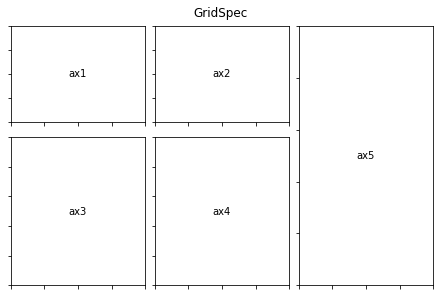

In [1]:
#practicing gridspec for better organization of charts

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True)

gs = GridSpec(5, 3, figure=fig)
ax1 = fig.add_subplot(gs[:2, :1])
ax2 = fig.add_subplot(gs[:2, 1:2])
ax3 = fig.add_subplot(gs[2:5, 0])
ax4 = fig.add_subplot(gs[2:5, -2])
ax5 = fig.add_subplot(gs[:, -1])

fig.suptitle("GridSpec")
format_axes(fig)

plt.show()

In [ ]:
netsta = ['CC.TEST','UW.TEST','CN.TEST']
start = ['2022-01-02','2022-04-05','2022-07-18']
end = ['2022-10-20','2022-04-20','2022-12-31']
for i in range(0,len(netsta)):
    x = pd.to_datetime([start[i],end[i]])
    y = [netsta[i],netsta[i]]
    plt.plot(x,y,label='a'+str(i))
plt.legend()
plt.show()

In [ ]:
# create data
# x = [10,20,30,40,50]
y = [30,30,30]

x = pd.to_datetime(['2022-01-02','2022-04-05','2022-07-18'])

y2 = [20,30,40]

In [ ]:
# plot lines
plt.plot(x, y, label = "line 1")
plt.plot(x, y2, label = "line 2")
plt.legend()
plt.show()